In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re

In [2]:
matplotlib.rcParams.update({'font.size': 11})

## First order bending

In [3]:
df1 = pd.read_csv(r'..\Final_data\First_order_bending\rectangular_filleted_first_order_bending_displacement_H_variation.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\First_order_bending\rectangular_filleted_first_order_bending_displacement_H_variation.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 2):
    new_column_name.append(','.join(column_name[i:i+2]))
df1.columns = new_column_name
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)  w (mm) @ H1=0.6, F1=1  w (mm) @ H1=1, F1=1
0          0.0     0.0     0.0               0.000000             0.000000
1          0.0     0.0     0.1               0.000000             0.000000
2          0.0     0.0     0.2               0.000000             0.000000
3          0.0     0.0     0.3               0.000000             0.000000
4          0.0     0.0     0.4               0.000000             0.000000
...        ...     ...     ...                    ...                  ...
202207    41.0     4.0     0.7              -4.417412            -1.196032
202208    41.0     4.0     0.8              -4.417409            -1.196028
202209    41.0     4.0     0.9              -4.417403            -1.196023
202210    41.0     4.0     1.0              -4.417396            -1.196016
202211    41.0     4.0     1.1              -4.417388            -1.196008

[202212 rows x 5 columns]

In [4]:
df2 = pd.read_csv(r'..\Final_data\First_order_bending\rectangular_filleted_first_order_bending_stress_H_variation.csv', skiprows = 4)
df2.rename(columns = {'% Minimum thickness (mm)': 'Minimum thickness (mm)'}, inplace = True)
df2 = df2.round({'Minimum thickness (mm)': 1, 'Applied force (N)': 2})
df2

Minimum thickness (mm)  Applied force (N)  Max von Mises stress (N/m^2)
0                     0.6                  1                  2.696426e+08
1                     1.0                  1                  1.235744e+08

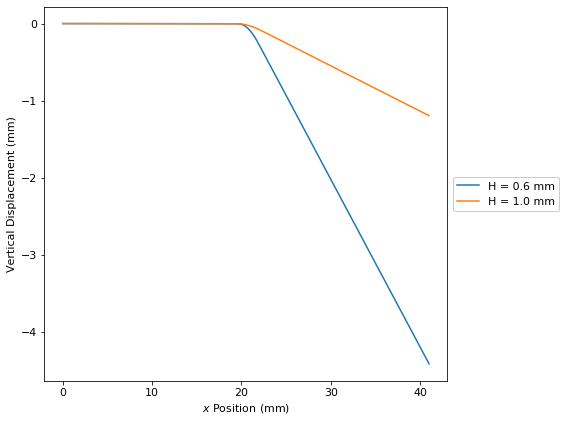

In [5]:
n = df1.shape[1] - 3
gradient = np.zeros(n)
pivot = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
for i in range(n):
    colname = df1.columns[i+3]
    h = float(re.findall(r'H1=(\d\.?\d*)', colname)[0])
    x_lim = 20.0 + 1.5
    df_process = df1[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= h]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    coe = np.polyfit(df_process[df_process['X (mm)'] >= x_lim]['X (mm)'], df_process[df_process['X (mm)'] >= x_lim][colname], 1)
    gradient[i] = np.abs(coe[0])
    pivot[i] = -coe[1] / coe[0]
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'H = {:.1f} mm'.format(h))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, framealpha = 1)

plt.tight_layout()
plt.show()

In [6]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (1.5 + 40.0 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2['1st order stiffness (Nm/°)'] = df2['Torque (Nm)'] / df2['Deflection angle (°)']
df2['Normalised 1st order stress (N/m^2°)'] = df2['Max von Mises stress (N/m^2)'] / df2['Deflection angle (°)']
df2

Minimum thickness (mm)  Applied force (N)  Max von Mises stress (N/m^2)  \
0                     0.6                  1                  2.696426e+08   
1                     1.0                  1                  1.235744e+08   

   X rotation pivot (mm)  Torque (Nm)  Deflection angle (°)  \
0              20.716391     0.020784             12.285199   
1              20.678666     0.020821              3.367320   

   1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  
0                    0.001692                          2.194857e+07  
1                    0.006183                          3.669814e+07

## Second order bending

In [7]:
df3 = pd.read_csv(r'..\Final_data\Second_order_bending\rectangular_filleted_second_order_bending_displacement_H_variation.csv', skiprows = 8)
df3.rename(columns = {'% X': 'X (mm)', 'Y': 'Y (mm)', 'Z': 'Z (mm)'}, inplace = True)
df3 = df3.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df3.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df3.reset_index(drop = True, inplace = True)
df3

X (mm)  Y (mm)  Z (mm)  w (mm) @ H1=0.6  w (mm) @ H1=1
0          0.0     0.0     0.0         0.000000       0.000000
1          0.0     0.0     0.1         0.000000       0.000000
2          0.0     0.0     0.2         0.000000       0.000000
3          0.0     0.0     0.3         0.000000       0.000000
4          0.0     0.0     0.4         0.000000       0.000000
...        ...     ...     ...              ...            ...
202207    41.0     4.0     0.7        -0.268877      -0.160087
202208    41.0     4.0     0.8        -0.268668      -0.159889
202209    41.0     4.0     0.9        -0.268432      -0.159660
202210    41.0     4.0     1.0        -0.268167      -0.159400
202211    41.0     4.0     1.1        -0.267875      -0.159109

[202212 rows x 5 columns]

In [8]:
df4 = pd.read_csv(r'..\Final_data\Second_order_bending\rectangular_filleted_second_order_bending_stress_H_variation.csv', skiprows = 4)
df4.rename(columns = {'% Minimum thickness (mm)': 'Minimum thickness (mm)'}, inplace = True)
df4['Applied force (N)'] = np.full(df4.shape[0], 35.0).round(1)
df4 = df4.round({'Minimum thickness (mm)': 1, 'Applied force (N)': 1})
df4

Minimum thickness (mm)  Max von Mises stress (N/m^2)  Applied force (N)
0                     0.6                  3.970281e+08               35.0
1                     1.0                  2.103035e+08               35.0

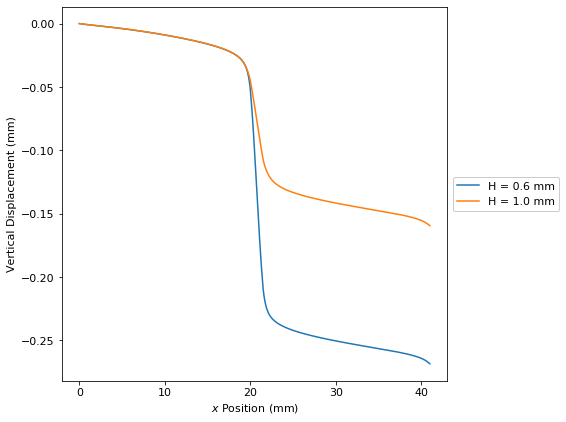

In [9]:
n = df3.shape[1] - 3
displacement = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
for i in range(n):
    colname = df3.columns[i+3]
    h = float(re.findall(r'H1=(\d\.?\d*)', colname)[0])
    x_lim = 20.0 + 1.5
    df_process = df3[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= h]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    displacement[i] = (df_process[df_process['X (mm)'] == 20.0][colname].values[0] - df_process[df_process['X (mm)'] == x_lim][colname].values[0]) * 0.001
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'H = {:.1f} mm'.format(h))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, framealpha = 1)

plt.tight_layout()
plt.show()

In [10]:
df4['Displacement (m)'] = displacement
df4['2nd order stiffness (N/m)'] = df4['Applied force (N)'] / df4['Displacement (m)']
df4['Normalised 2nd order stress (N/m^3)'] = df4['Max von Mises stress (N/m^2)'] / df4['Displacement (m)']
df4

Minimum thickness (mm)  Max von Mises stress (N/m^2)  Applied force (N)  \
0                     0.6                  3.970281e+08               35.0   
1                     1.0                  2.103035e+08               35.0   

   Displacement (m)  2nd order stiffness (N/m)  \
0          0.000157              222365.252775   
1          0.000062              561635.648416   

   Normalised 2nd order stress (N/m^3)  
0                         2.522436e+12  
1                         3.374684e+12

## Performance characterisation

In [11]:
df5 = df2[['Minimum thickness (mm)', 'X rotation pivot (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df5['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df5['Displacement (m)'] = df4['Displacement (m)']
df5['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df5['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df5

Minimum thickness (mm)  X rotation pivot (mm)  Deflection angle (°)  \
0                     0.6              20.716391             12.285199   
1                     1.0              20.678666              3.367320   

   1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  \
0                    0.001692                          2.194857e+07   
1                    0.006183                          3.669814e+07   

   1st order max stress (N/m^2)  Displacement (m)  2nd order stiffness (N/m)  \
0                  2.696426e+08          0.000157              222365.252775   
1                  1.235744e+08          0.000062              561635.648416   

   2nd order max stress (N/m^2)  
0                  3.970281e+08  
1                  2.103035e+08

In [12]:
df5['Parameter1'] = df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']
df5['Parameter2'] = df5['1st order max stress (N/m^2)'] / (df5['1st order stiffness (Nm/°)'] * df5['Deflection angle (°)'])
df5['Parameter3'] = df5['2nd order max stress (N/m^2)'] / (df5['2nd order stiffness (N/m)'] * df5['Displacement (m)'])
df5['Dimensionless'] = (df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']) * ((40.0 + 1.5 - df5['X rotation pivot (mm)']) * 0.001)**2
df5

Minimum thickness (mm)  X rotation pivot (mm)  Deflection angle (°)  \
0                     0.6              20.716391             12.285199   
1                     1.0              20.678666              3.367320   

   1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  \
0                    0.001692                          2.194857e+07   
1                    0.006183                          3.669814e+07   

   1st order max stress (N/m^2)  Displacement (m)  2nd order stiffness (N/m)  \
0                  2.696426e+08          0.000157              222365.252775   
1                  1.235744e+08          0.000062              561635.648416   

   2nd order max stress (N/m^2)    Parameter1    Parameter2    Parameter3  \
0                  3.970281e+08  1.314402e+08  1.297381e+10  1.134366e+07   
1                  2.103035e+08  9.083025e+07  5.934988e+09  6.008672e+06   

   Dimensionless  
0   56776.692967  
1   39377.450025

In [13]:
df6 = df2[['Minimum thickness (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df6['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df6['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df6['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df6['Stiffness ratio'] = df5['Dimensionless']
df6.to_csv('rectangular_H_variation.csv', index = False)